In [134]:
import cv2
from PIL import Image 
import pytesseract
from matplotlib import pyplot as plt
import numpy as np
import pytesseract

In [140]:
image_url = r"data/IvV2y.png"

In [18]:
im = Image.open(image_url)

In [15]:
# im.show()
# print(im)

In [100]:
# img_url = r"data/velveteen_rabbit.png"
# img_url = r"data/page_01.jpg"
# img_url = r"data/somewhere.png"
img_url = r"data/myImg.jpg"

In [101]:
img = cv2.imread(img_url)

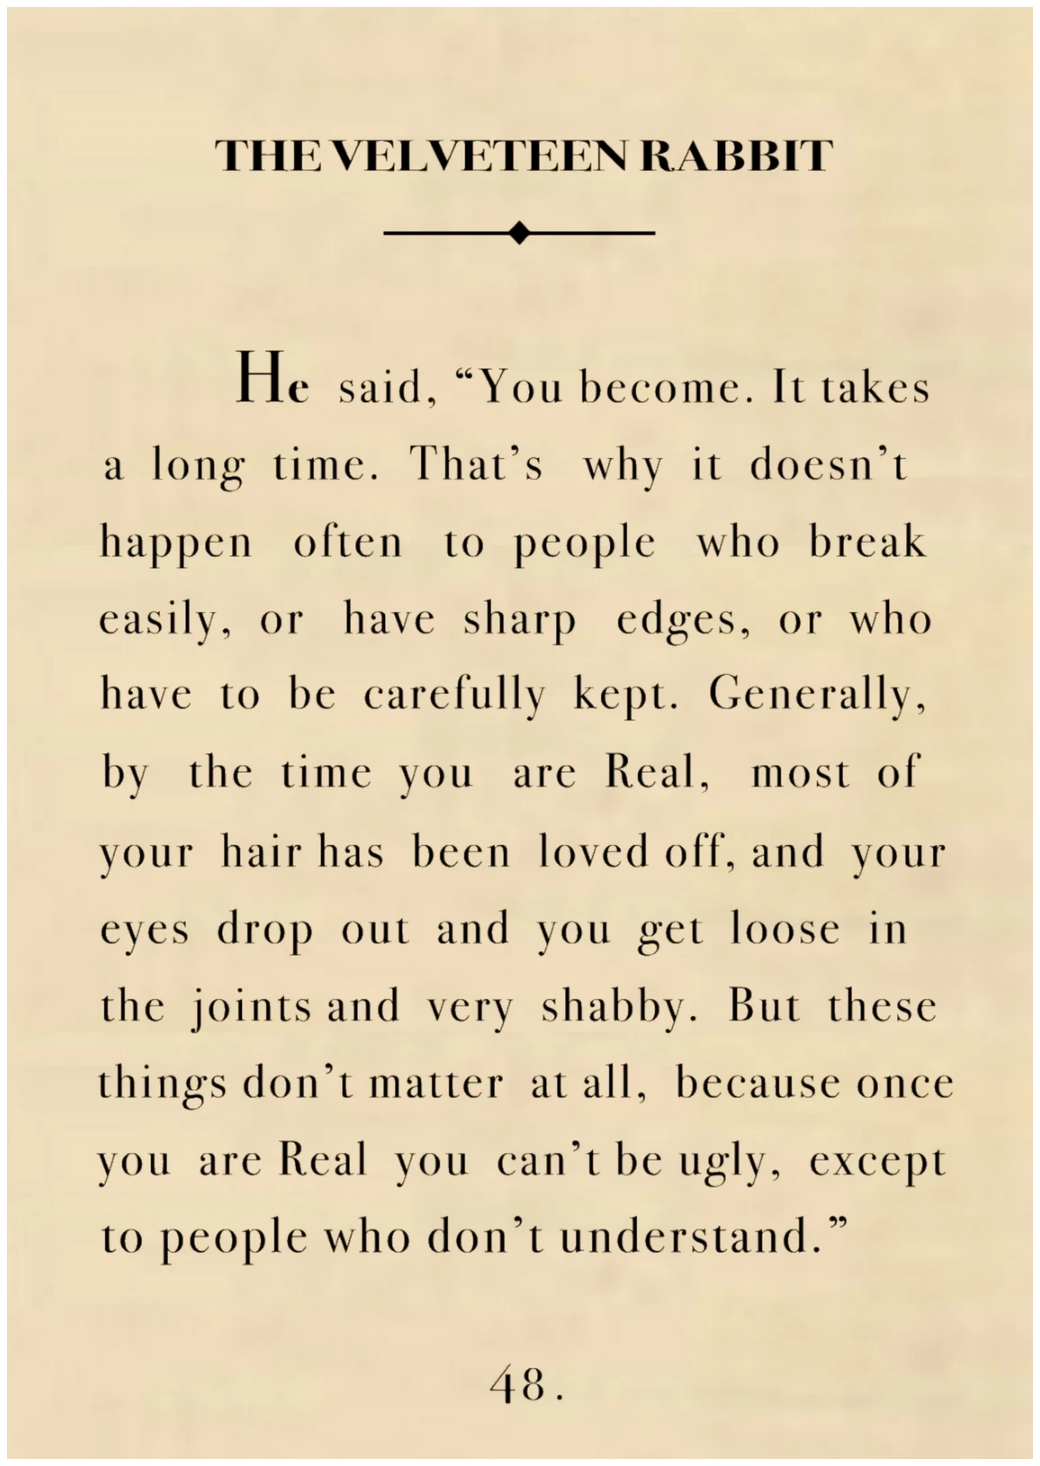

In [102]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(image):
    cv2.imwrite("woho.png",image)
    dpi = 80
    im_data = plt.imread("woho.png")

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()
display(img)

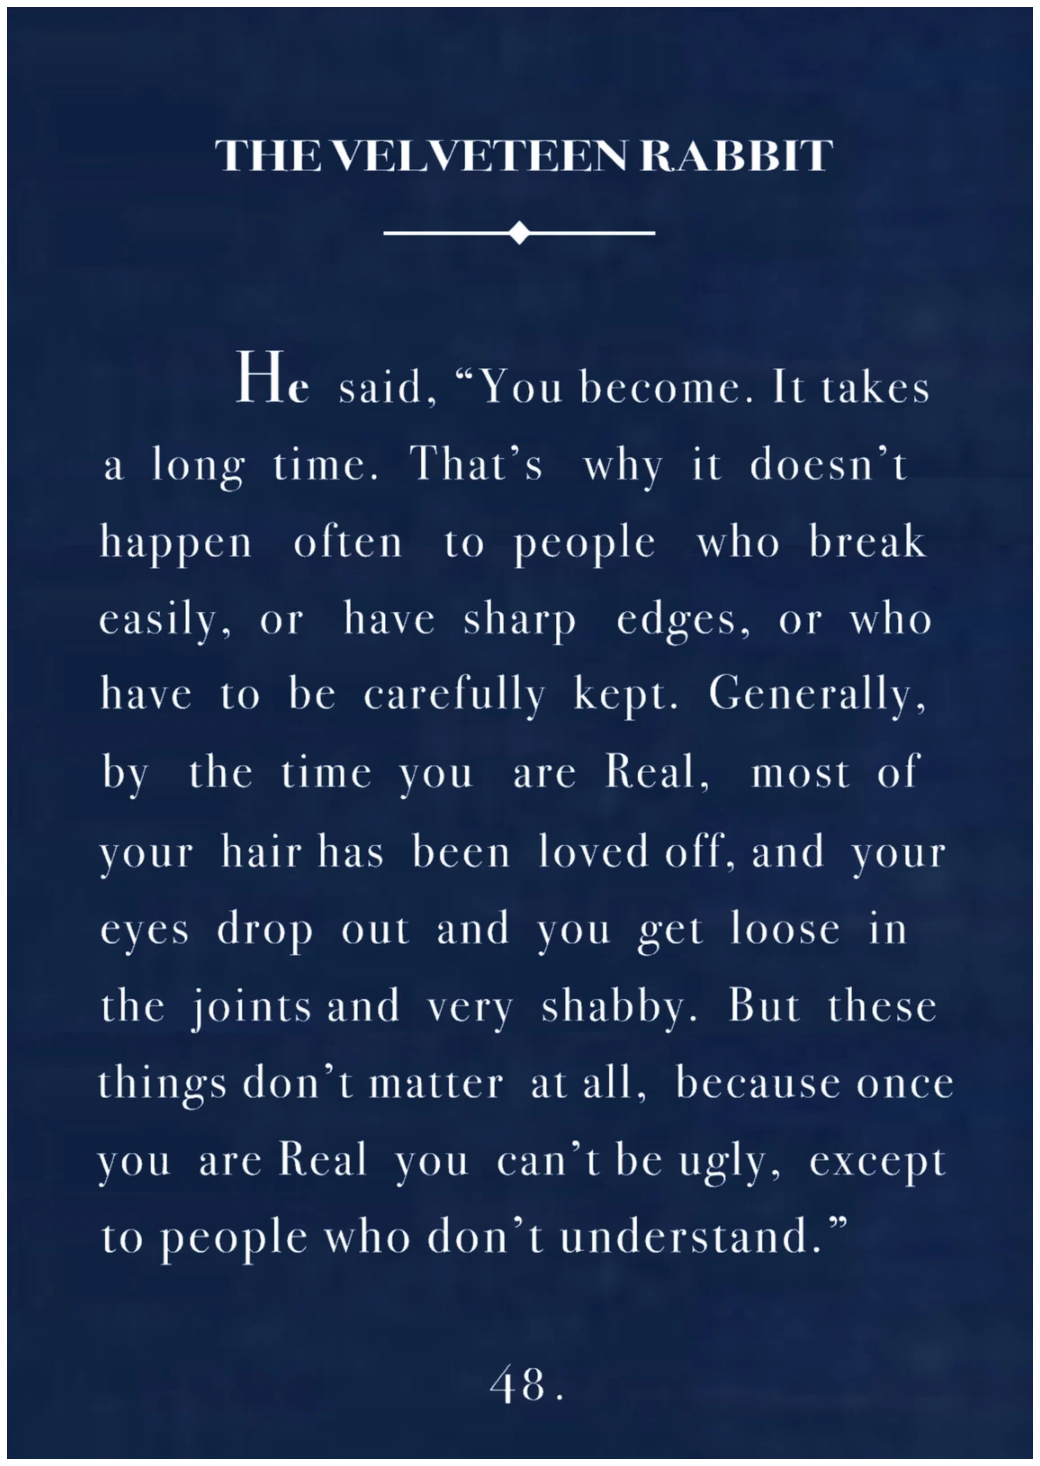

In [103]:
inverted_img = cv2.bitwise_not(img)
display(inverted_img)

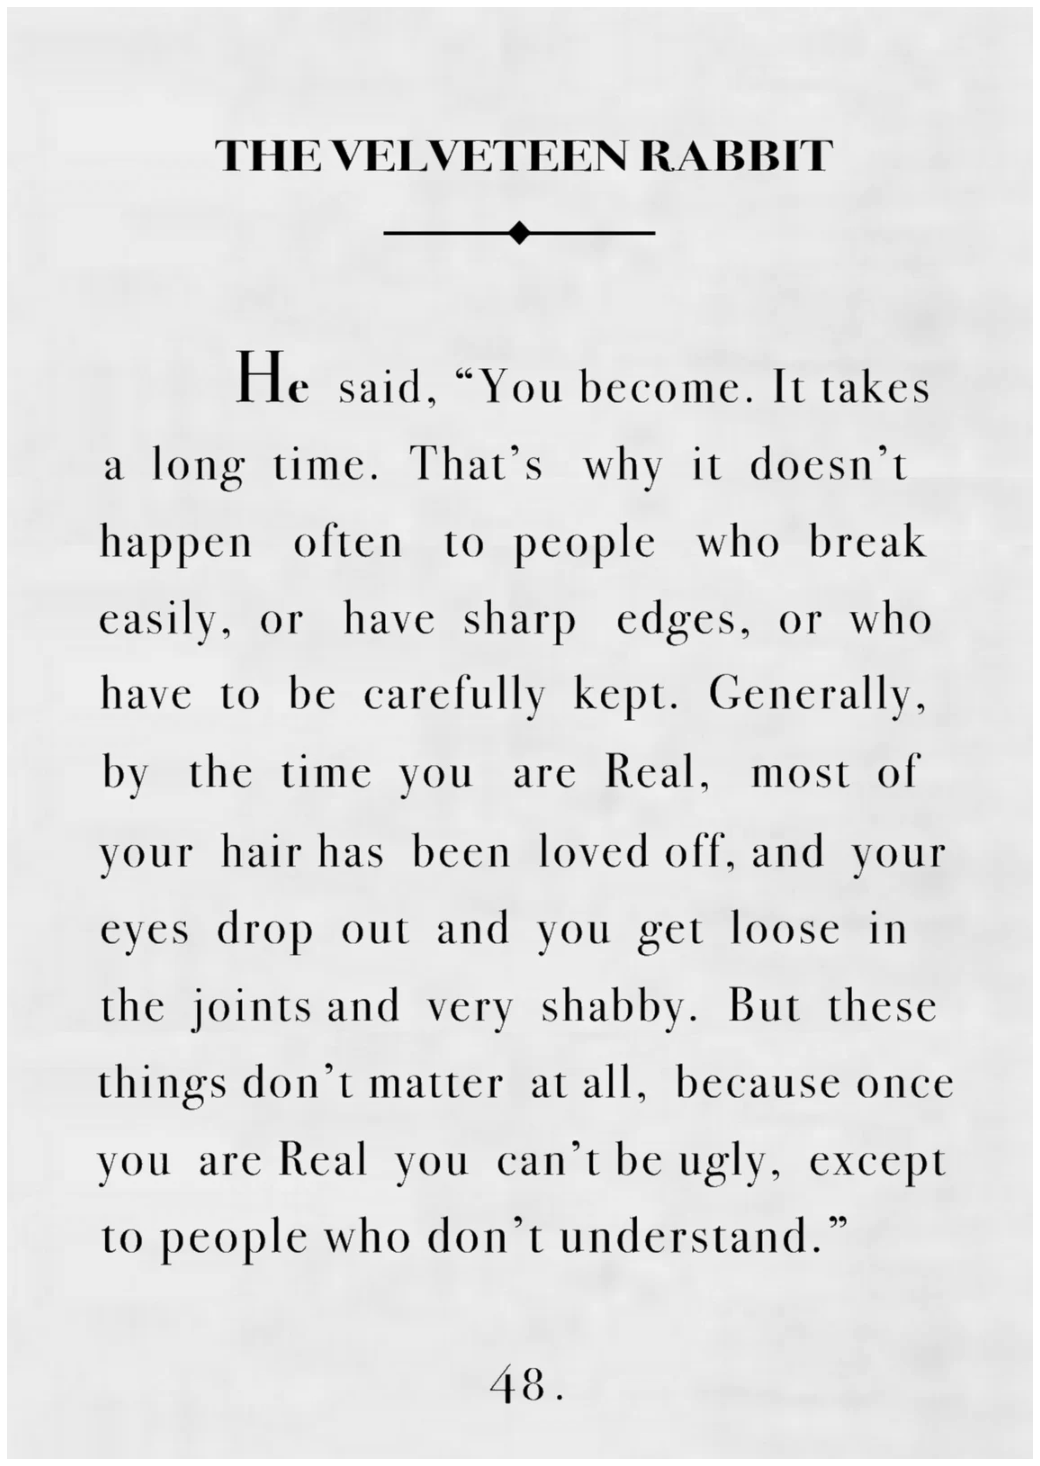

In [104]:
greyedImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(greyedImage)

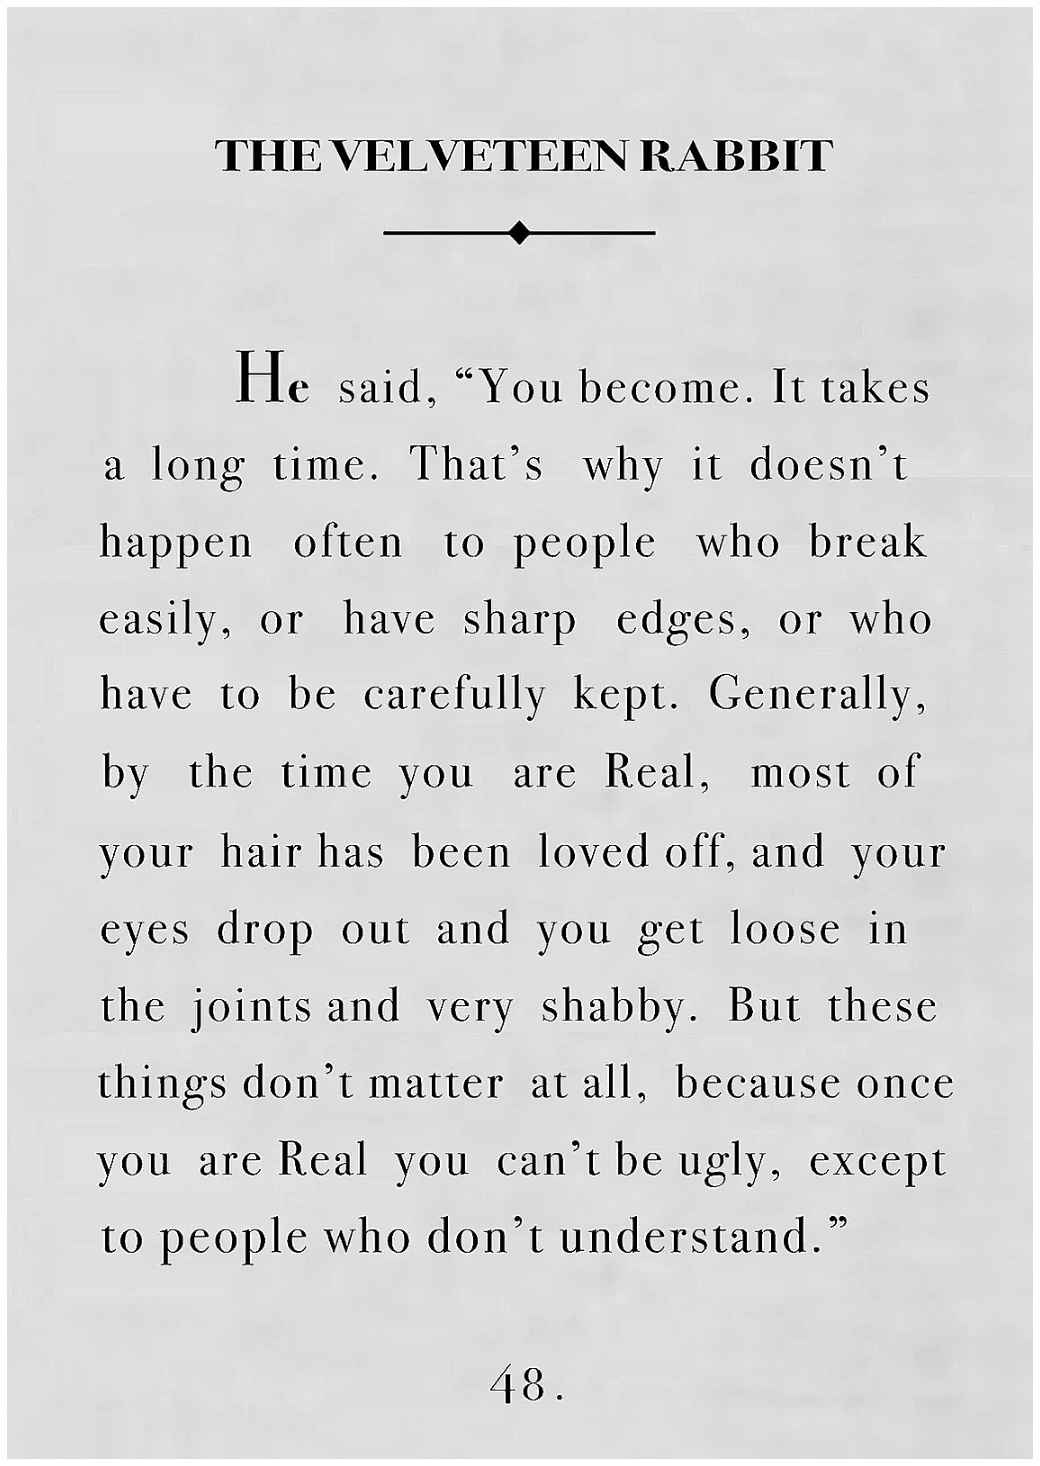

In [107]:
# Estimate the blur kernel (you might need to provide this or use a different method)
# For this example, we'll use a simple kernel for demonstration purposes
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]], dtype=np.float32)

# Apply Wiener deconvolution to reduce blur
deconvolved_image = cv2.filter2D(greyedImage, -1, kernel)
# deconvolved_image = cv2.filter2D(deconvolved_image, -1, kernel)
display(deconvolved_image)

# # Convert the deconvolved image back to BGR format (if needed)
# deconvolved_image_bgr = cv2.cvtColor(deconvolved_image, cv2.COLOR_GRAY2BGR)

# # Display the original and deconvolved images
# # cv2.imshow('Original Blurry Image', blurry_image)
# display(deconvolu)
# cv2.imshow('Deconvolved Image', deconvolved_image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


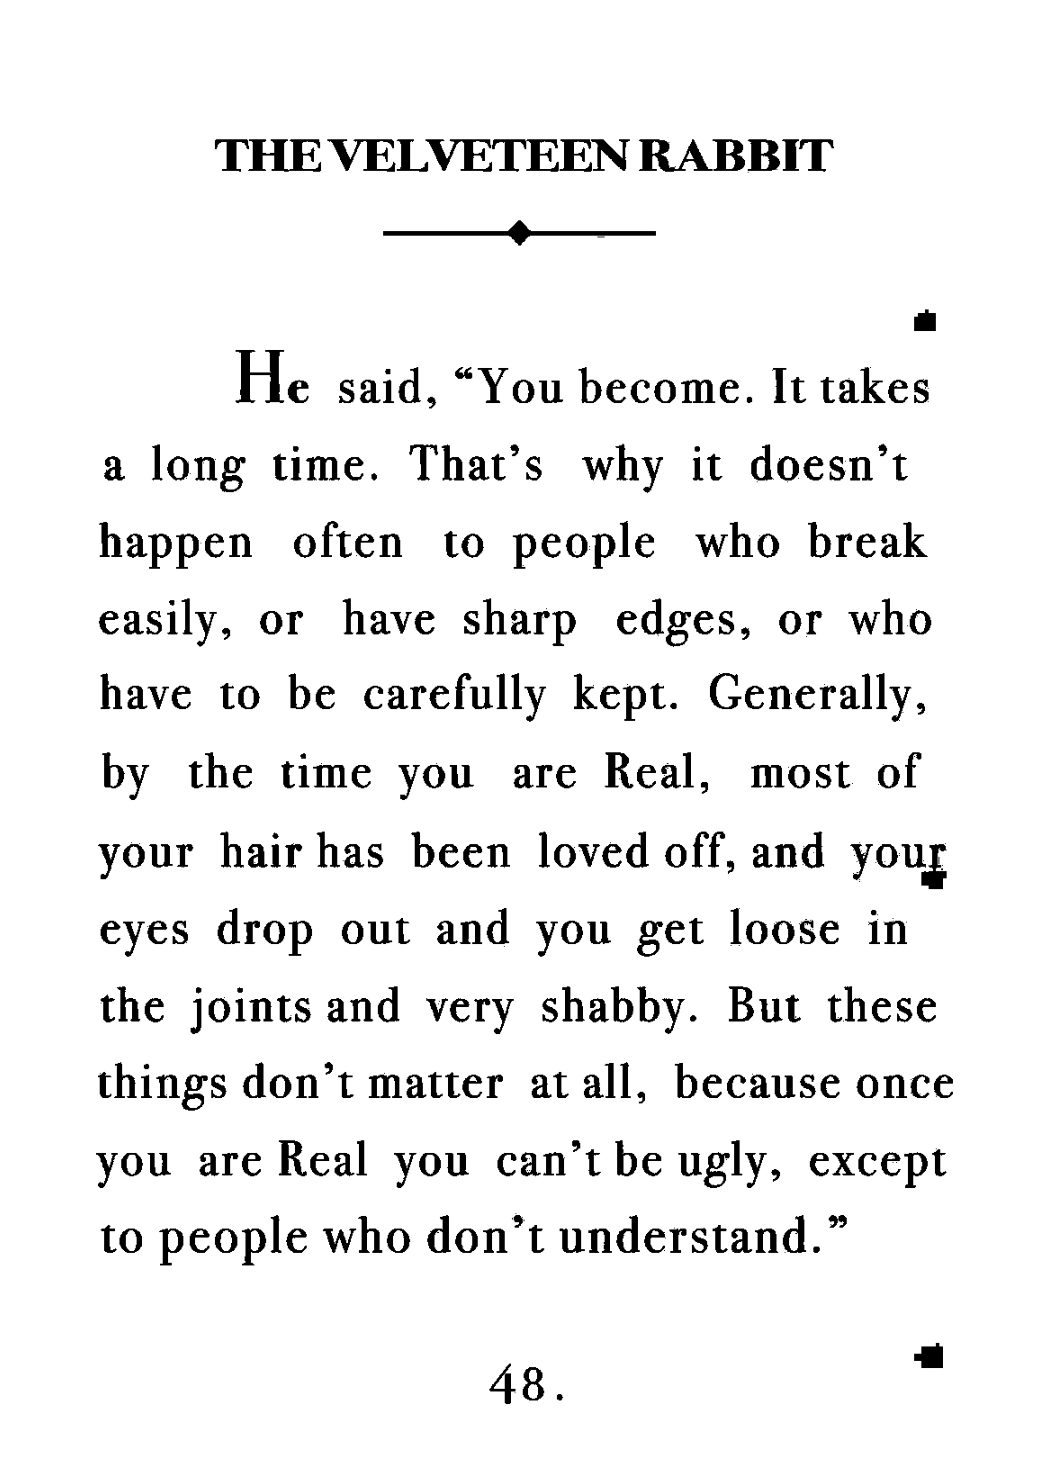

In [108]:
thresh, img_bw = cv2.threshold(greyedImage, 210, 230, cv2.THRESH_BINARY)
display(img_bw)

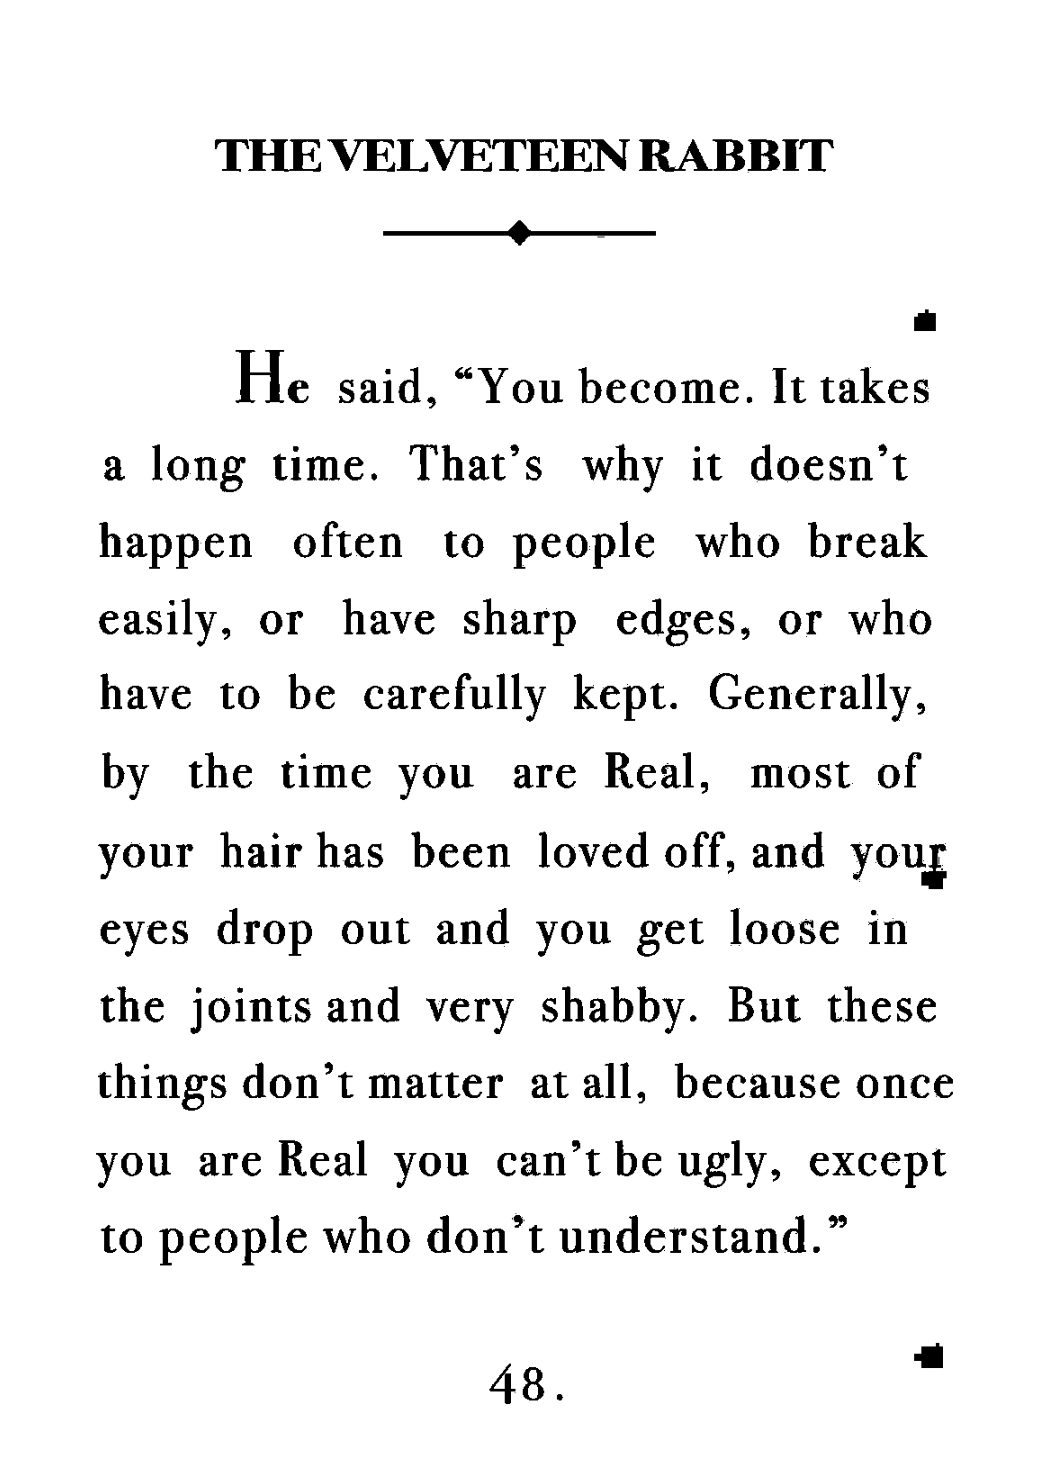

In [131]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 1)
    return (image)
# for i in range(1000):
no_noise_image = noise_removal(no_noise_image)

display(no_noise_image)

In [133]:
cv2.imwrite("data/no_noise.jpg", no_noise_image)

True

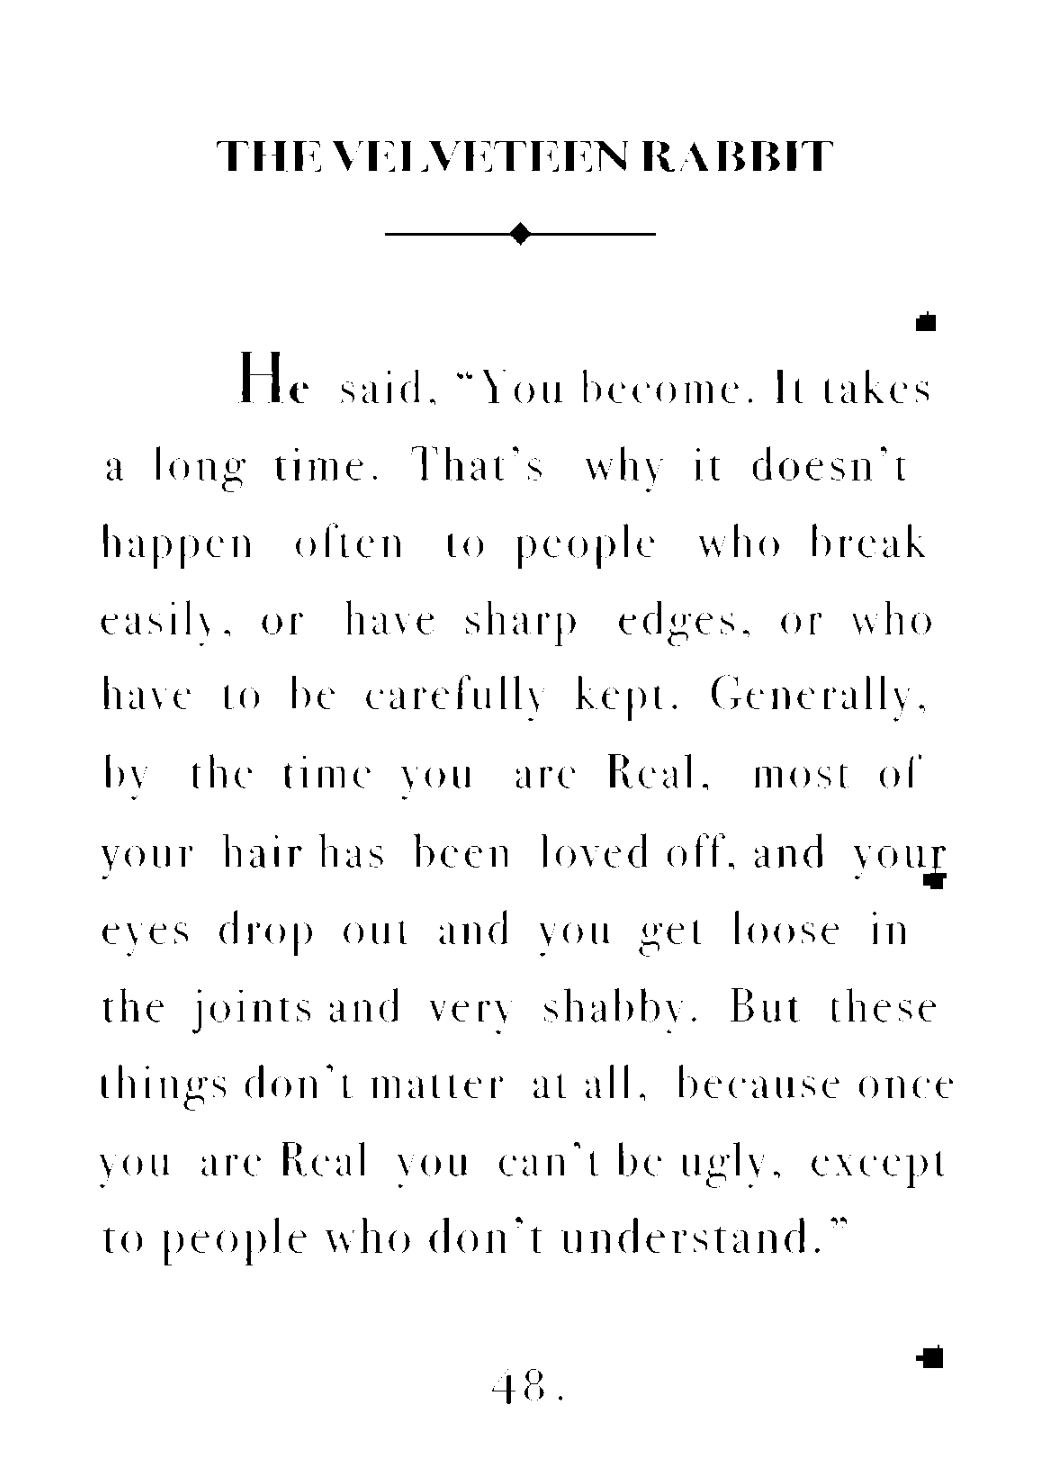

In [112]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)
eroded_image = thin_font(no_noise_image)
eroded_image2 = thin_font(eroded_image)
display(eroded_image2)

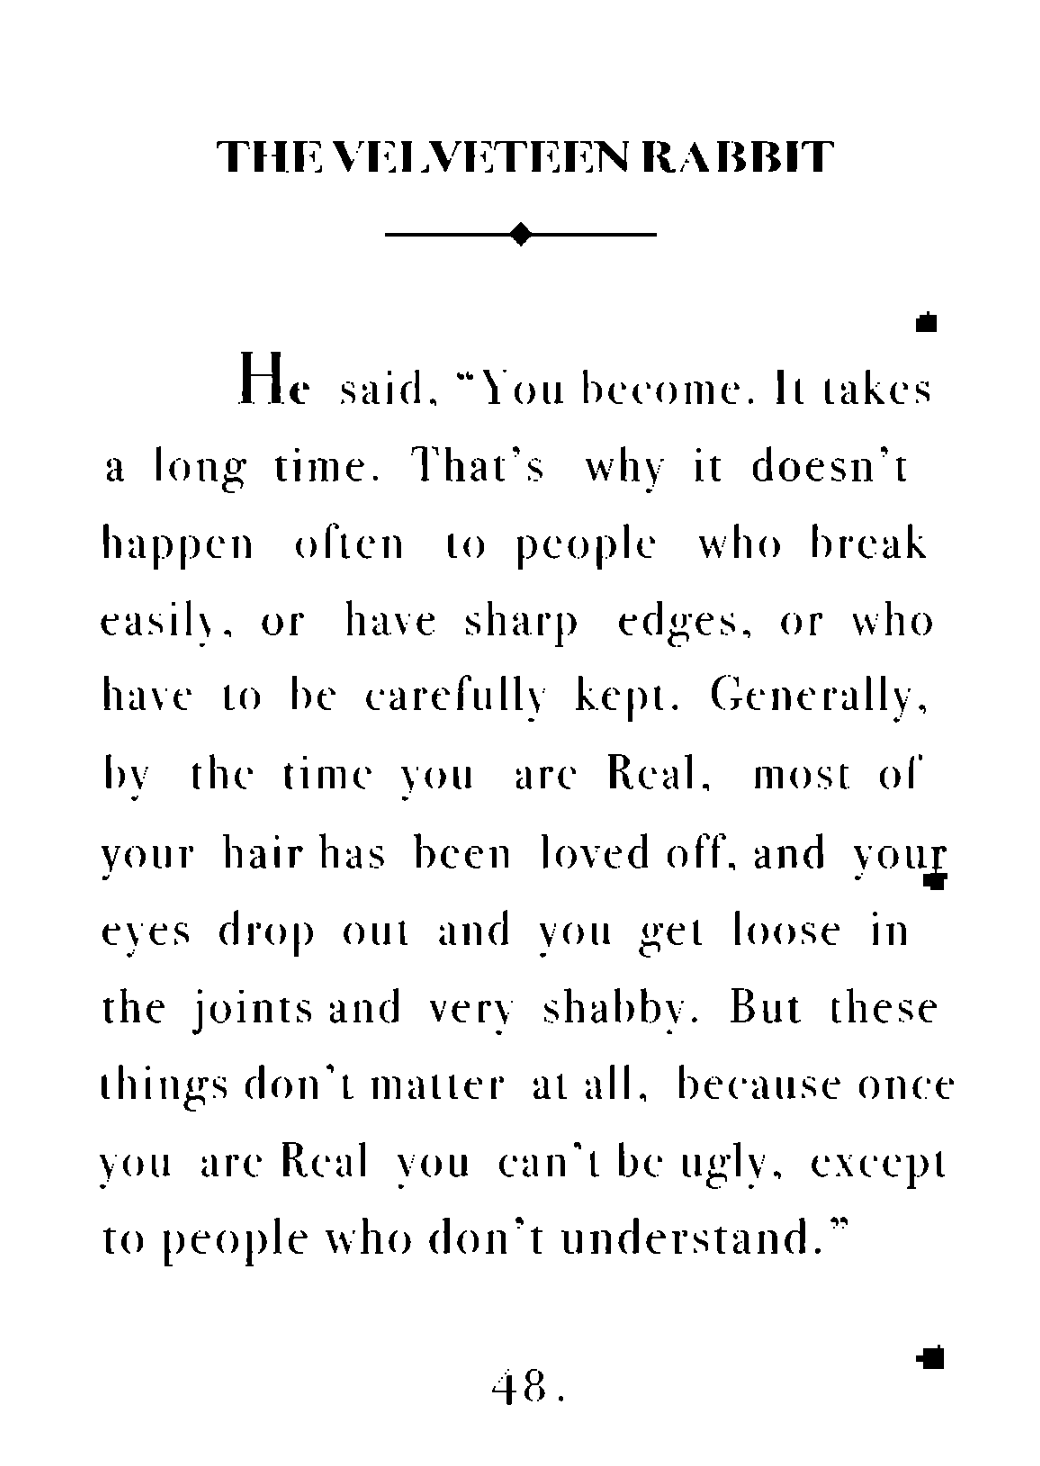

In [113]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)
dialated_image = thick_font(eroded_image2)
display(dialated_image)

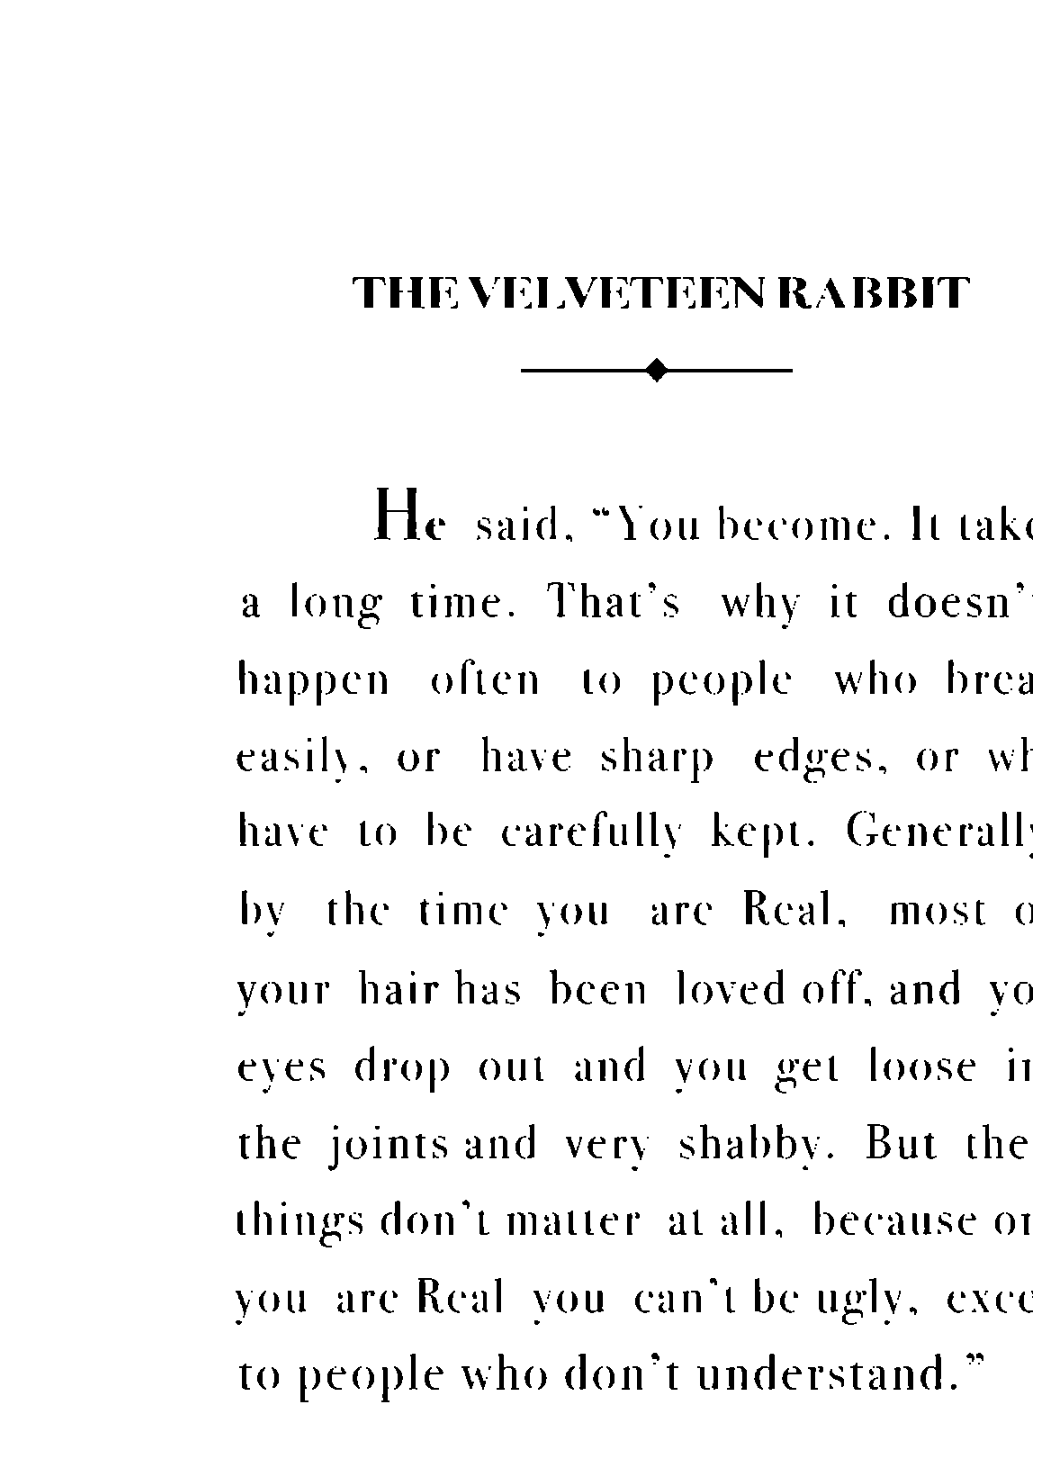

In [130]:
for i in range(50):
    dialated_image = thin_font(thick_font(dialated_image))
display(dialated_image)

In [141]:
ocr_result = pytesseract.image_to_string(image_url)


In [142]:
print(ocr_result)

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...

